# Ungraded Lab: Coding a Wide and Deep Model

<a target="_blank" href="https://colab.research.google.com/github/LuisAngelMendozaVelasco/TensorFlow-Advanced_Techniques_Specialization/blob/master/Custom_Models_Layers_and_Loss_Functions_with_TensorFlow/Week4/Labs/C1_W4_Lab_1_basic-model.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png">Run in Google Colab</a>

In this lab, we'll show how you can implement a wide and deep model. We'll first look at how to build it with the Functional API then show how to encapsulate this into a class. Let's get started!

## Imports

In [1]:
from keras import Input, layers, Model, utils

2024-08-22 02:35:03.871118: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-22 02:35:03.883445: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-22 02:35:03.887315: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-22 02:35:03.896169: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Build the Model

Let's implement the wide and deep model as shown in class. As shown below, the Functional API is very flexible in implementing complex models. 
- You will specify the previous layer when you define a new layer. 
- When you define the `Model`, you will specify the inputs and output.

2024-08-22 02:35:05.601406: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 1907 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5


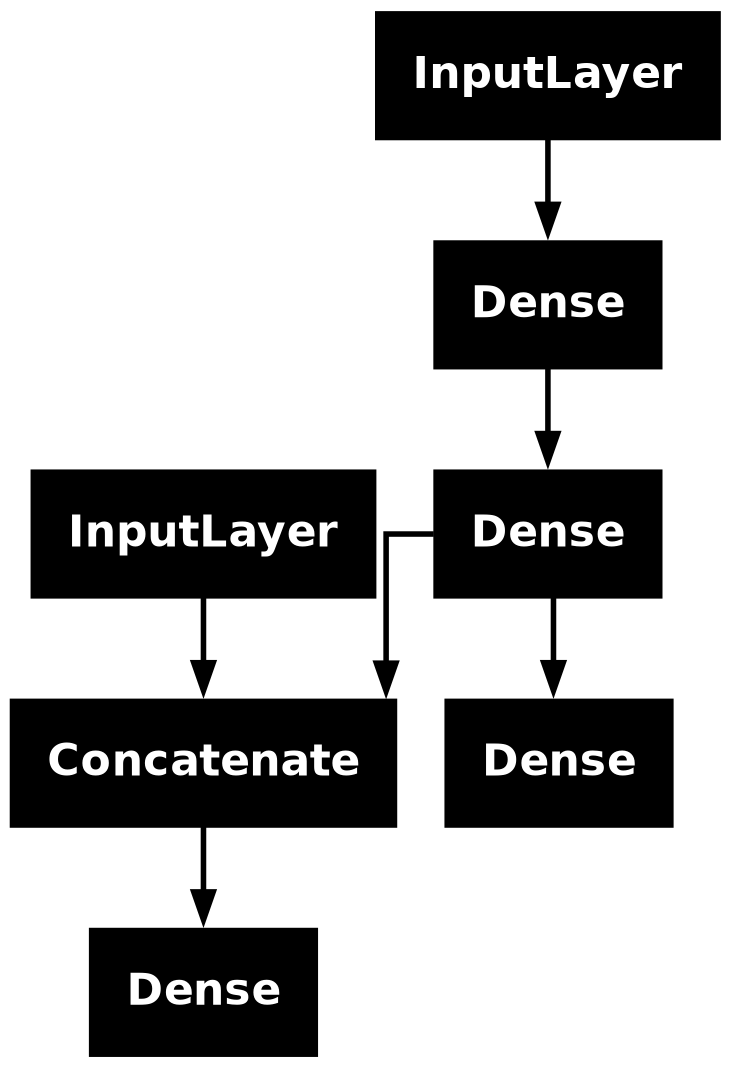

In [2]:
# Define inputs
input_a = Input(shape=(1,), name="Wide_Input")
input_b = Input(shape=(1,), name="Deep_Input")

# Define deep path
hidden_1 = layers.Dense(30, activation="relu")(input_b)
hidden_2 = layers.Dense(30, activation="relu")(hidden_1)

# Define merged path
concat = layers.concatenate([input_a, hidden_2])
output = layers.Dense(1, name="Output")(concat)

# Define another output for the deep path
aux_output = layers.Dense(1,name="aux_Output")(hidden_2)

# Build the model
model = Model(inputs=[input_a, input_b], outputs=[output, aux_output])

# Visualize the architecture
utils.plot_model(model)

## Implement as a Class

Alternatively, you can also implement this same model as a class. 
- For that, you define a class that inherits from the [Model](https://keras.io/api/models/model/) class.
- Inheriting from the existing `Model` class lets you use the Model methods such as `compile()`, `fit()`, `evaluate()`. 

When inheriting from `Model`, you will want to define at least two functions:
- `__init__()`: you will initialize the instance attributes.
- `call()`: you will build the network and return the output layers.

If you compare the two methods, the structure is very similar, except when using the class, you'll define all the layers in one function, `init`, and connect the layers together in another function, `call`.

In [3]:
# Inherit from the Model base class
class WideAndDeepModel(Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        '''Initializes the instance attributes'''

        super().__init__(**kwargs)
        self.hidden1 = layers.Dense(units, activation=activation)
        self.hidden2 = layers.Dense(units, activation=activation)
        self.main_output = layers.Dense(1)
        self.aux_output = layers.Dense(1)

    def call(self, inputs):
        '''Defines the network architecture'''

        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        
        return main_output, aux_output

In [4]:
# Create an instance of the model
model = WideAndDeepModel()

In [5]:
!rm *.png